In [89]:
import torch

from PIL import Image, ImageOps

import getmodel 

from train import GhibliModel
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from torch.autograd import Variable
import processing_methods as PM
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ghibliImg = 7

save_model_path = './models/models/results/model{}.pth'.format(ghibliImg)

def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = display(image)
    print(type(image))
    if title is not None:
        plt.title(title)
    plt.imshow(image)
    
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

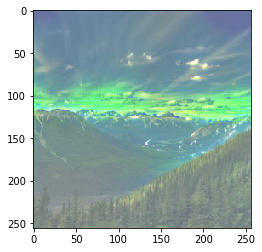

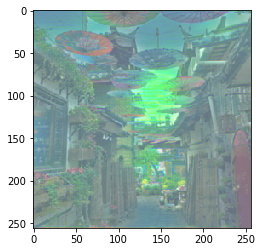

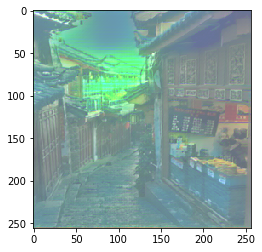

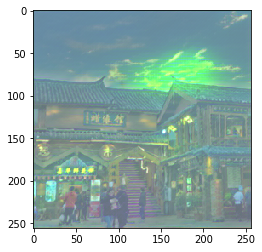

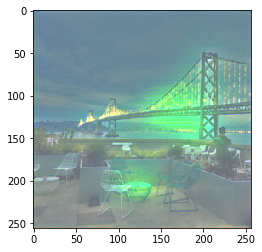

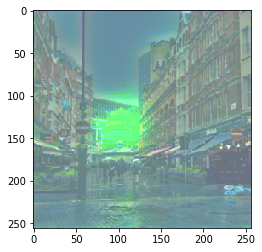

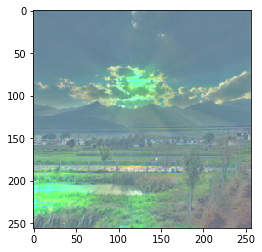

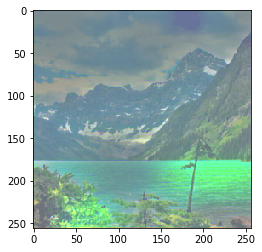

In [91]:
class Stylize:
    def __init__(self, learning_rate=0.001):
        self.model = GhibliModel()
        self.state_dict = torch.load(save_model_path, map_location = 'cpu')
        for k in list(self.state_dict.keys()):
                if re.search(r'in\d+\.running_(mean|var)$', k):
                    del self.state_dict[k]
        self.model.net.load_state_dict(self.state_dict, strict =False)
        self.model.net.to(device)
    def style_transfer(self, content_img, target_path):
        content = PM.load_image(content_img)
        output = self.model.net(content)
        #'deprocess' image
        
        output[:,0,:,:] += 103.939
        output[:,1,:,:] += 116.779
        output[:,2,:,:] +=123.68
        
        
        
        output = output.detach()
        output = output.numpy().transpose(0,2,3,1).reshape(256,256,3)
        output = np.clip(output, 0, 255).astype('uint8')
        output_img = Image.fromarray(output)
        plt.figure()
        plt.imshow(output_img)
        plt.show()
        output_img.save(target_path)
        
if __name__ == "__main__":
    model = Stylize()
    model.style_transfer("./assets/content/real_square_1.jpeg", "./assets/results/result{}_1.jpg".format(ghibliImg))
    model.style_transfer("./assets/content/real_square_2_1.jpg", "./assets/results/result{}_2_1.jpg".format(ghibliImg))
    model.style_transfer("./assets/content/real_square_2_2.jpg", "./assets/results/result{}_2_2.jpg".format(ghibliImg))
    model.style_transfer("./assets/content/real_square_2_3.jpg", "./assets/results/result{}_2_3.jpg".format(ghibliImg))
    model.style_transfer("./assets/content/real_square_4.jpg", "./assets/results/result{}_4.jpg".format(ghibliImg))
    model.style_transfer("./assets/content/real_square_5_1.jpg", "./assets/results/result{}_5.jpg".format(ghibliImg))
    model.style_transfer("./assets/content/real_square_6.jpg", "./assets/results/result{}_6.jpg".format(ghibliImg))
    model.style_transfer("./assets/content/real_square_7.jpg", "./assets/results/result{}_7.jpg".format(ghibliImg))
    


[[[[0.485]]

  [[0.456]]

  [[0.406]]]]
